In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt




%matplotlib inline 

In [95]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)
housing.shape

(2580, 81)

In [3]:
Realestate = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)
Realestate.shape

C:\Users\ask91\AppData\Local\Temp\ipykernel_11616\2318822397.py:1: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  Realestate = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)


(22213, 90)

In [45]:
housinghousing.head()

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
1  909176150        856     126000          30       RL          NaN     7890   
2  905476230       1049     139500         120       RL         42.0     4235   
3  911128020       1001     124900          30  C (all)         60.0     6060   
4  535377150       1039     114000          70       RL         80.0     8146   
5  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
1   Pave   NaN      Reg  ...         166        0    NaN   NaN         NaN   
2   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
3   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
4   Pave   NaN      Reg  ...         111        0    NaN   NaN         NaN   
5   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold SaleType  SaleCondition  
1       0      3   2010      WD          Normal  
2       0      2   2009      WD          Normal  
3       0     11   2007      WD          Normal  
4       0      5   2009      WD          Normal  
5       0     11   2009      WD          Normal  

[5 rows x 81 columns]

In [46]:
housing.describe()

PID    GrLivArea      SalePrice   MSSubClass  LotFrontage  \
count  2.580000e+03  2580.000000    2580.000000  2580.000000  2118.000000   
mean   7.148300e+08  1486.039922  178059.623256    57.691860    68.516053   
std    1.886626e+08   488.650181   75031.089374    42.802105    22.835831   
min    5.263011e+08   334.000000   12789.000000    20.000000    21.000000   
25%    5.313630e+08  1112.000000  129975.000000    20.000000    57.000000   
50%    5.354546e+08  1436.000000  159900.000000    50.000000    68.000000   
75%    9.071811e+08  1733.000000  209625.000000    70.000000    80.000000   
max    1.007100e+09  4676.000000  755000.000000   190.000000   313.000000   

             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    2580.000000  2580.000000  2580.000000  2580.000000   2580.000000   
mean    10120.153488     6.046124     5.618605  1970.313953   1983.751938   
std      8126.937892     1.367590     1.122008    29.719705     20.490242   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7406.750000     5.000000     5.000000  1953.000000   1965.000000   
50%      9391.000000     6.000000     5.000000  1972.000000   1992.000000   
75%     11494.000000     7.000000     6.000000  1999.000000   2003.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

       ...   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  ...  2579.000000  2580.000000  2580.000000    2580.000000  2580.000000   
mean   ...   466.842575    95.919767    46.085271      23.214341     2.511240   
std    ...   207.476842   129.052016    66.060664      64.107825    25.293935   
min    ...     0.000000     0.000000     0.000000       0.000000     0.000000   
25%    ...   318.000000     0.000000     0.000000       0.000000     0.000000   
50%    ...   474.000000     0.000000    25.500000       0.000000     0.000000   
75%    ...   576.000000   168.000000    68.000000       0.000000     0.000000   
max    ...  1488.000000  1424.000000   742.000000    1012.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  2580.000000  2580.000000   2580.000000  2580.000000  2580.000000  
mean     16.200388     1.662016     48.731395     6.150775  2007.838372  
std      56.824783    30.339396    498.725058     2.670647     1.312333  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  15500.000000    12.000000  2010.000000  

[8 rows x 38 columns]

In [47]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [48]:

housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [4]:
# Getting the numerical features out of the dataset

print(f"The total number of numerical features is :",  {len(housing.select_dtypes(exclude='object').columns)},"\n" ,
      housing.select_dtypes(exclude='object').columns)

The total number of numerical features is : {38} 
 Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [96]:

# dropping ID column

housing.drop(columns=['PID'], inplace=True)

In [97]:
# missing Values

# show only the count of columns with null values

columns_NA = housing.isna().sum()[housing.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))

columns_NA


Columns with missing values: 27


PoolQC          2571
MiscFeature     2483
Alley           2412
Fence           2055
FireplaceQu     1241
LotFrontage      462
GarageCond       129
GarageQual       129
GarageFinish     129
GarageYrBlt      129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtFinType1      69
BsmtQual          69
BsmtCond          69
MasVnrArea        14
MasVnrType        14
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Electrical         1
dtype: int64

In [51]:
# check correlation of missing values columns to price


corr_col = list(columns_NA.index)
corr_col.append('SalePrice')
housing[corr_col].corr()

LotFrontage  GarageYrBlt  MasVnrArea  BsmtHalfBath  \
LotFrontage      1.000000     0.051578    0.202139     -0.028832   
GarageYrBlt      0.051578     1.000000    0.246120     -0.053576   
MasVnrArea       0.202139     0.246120    1.000000      0.002436   
BsmtHalfBath    -0.028832    -0.053576    0.002436      1.000000   
BsmtFullBath     0.106641     0.174757    0.129113     -0.164064   
TotalBsmtSF      0.307885     0.339679    0.361515      0.000899   
BsmtUnfSF        0.104167     0.133690    0.080283     -0.108801   
GarageCars       0.302285     0.581007    0.348303     -0.029313   
GarageArea       0.337158     0.554057    0.348993     -0.018288   
BsmtFinSF2       0.055247    -0.046385   -0.009519      0.101400   
BsmtFinSF1       0.177304     0.214492    0.277336      0.067414   
SalePrice        0.358577     0.520763    0.500964     -0.033802   

              BsmtFullBath  TotalBsmtSF  BsmtUnfSF  GarageCars  GarageArea  \
LotFrontage       0.106641     0.307885   0.104167    0.302285    0.337158   
GarageYrBlt       0.174757     0.339679   0.133690    0.581007    0.554057   
MasVnrArea        0.129113     0.361515   0.080283    0.348303    0.348993   
BsmtHalfBath     -0.164064     0.000899  -0.108801   -0.029313   -0.018288   
BsmtFullBath      1.000000     0.330192  -0.383609    0.161022    0.183992   
TotalBsmtSF       0.330192     1.000000   0.421573    0.435333    0.465177   
BsmtUnfSF        -0.383609     0.421573   1.000000    0.166081    0.149994   
GarageCars        0.161022     0.435333   0.166081    1.000000    0.889603   
GarageArea        0.183992     0.465177   0.149994    0.889603    1.000000   
BsmtFinSF2        0.169453     0.110119  -0.242334   -0.004548    0.016331   
BsmtFinSF1        0.632603     0.512642  -0.480927    0.261766    0.298309   
SalePrice         0.291080     0.652222   0.167519    0.638801    0.634992   

              BsmtFinSF2  BsmtFinSF1  SalePrice  
LotFrontage     0.055247    0.177304   0.358577  
GarageYrBlt    -0.046385    0.214492   0.520763  
MasVnrArea     -0.009519    0.277336   0.500964  
BsmtHalfBath    0.101400    0.067414  -0.033802  
BsmtFullBath    0.169453    0.632603   0.291080  
TotalBsmtSF     0.110119    0.512642   0.652222  
BsmtUnfSF      -0.242334   -0.480927   0.167519  
GarageCars     -0.004548    0.261766   0.638801  
GarageArea      0.016331    0.298309   0.634992  
BsmtFinSF2      1.000000   -0.058911   0.022520  
BsmtFinSF1     -0.058911    1.000000   0.460792  
SalePrice       0.022520    0.460792   1.000000

In [52]:
# Delete Columns with Negative Correlations

#housing.drop(columns=['BsmtHalfBath'], inplace=True)



# Delete top 5 columns with missing values

#housing.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], inplace=True)

# Remove Columns with small correlation

#housing.drop(columns=['BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','LotFrontage','GarageYrBlt'], inplace=True)

In [29]:
# Fill the rest of Null. Columns with best fill based on Discription File



housing['MasVnrType'].fillna('None', inplace=True)


for i in ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1']:
    housing[i].fillna('NA', inplace=True)

# Replacing small number of null value with most common value in column

housing['Electrical'].fillna(housing['Electrical'].value_counts().idxmax(), inplace=True)
housing['MasVnrArea'].fillna(housing['MasVnrArea'].value_counts().idxmax(), inplace=True)
housing['GarageCars'].fillna(housing['GarageCars'].value_counts().idxmax(), inplace=True)
housing['GarageArea'].fillna(housing['GarageArea'].value_counts().idxmax(), inplace=True)
housing['TotalBsmtSF'].fillna(housing['TotalBsmtSF'].value_counts().idxmax(), inplace=True)

# From the Data description File we see the following columns has the same values.
# Columns FireplaceQu ,BsmtQual,ExterQual ,ExterCond ,HeatingQC,BsmtCond ,GarageQual ,KitchenQual , GarageCond 
# they have the same values to decribe them :

# Ex	Excellent
# Gd	Good
# TA	Typical/Average
# Fa	Fair
# Po	Poor
# NA	No Garage


# so we replace the cahr values with numerical and NA with 0


housing['BsmtQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['BsmtQual'].fillna(0, inplace=True)

housing['ExterQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['ExterQual'].fillna(0, inplace=True)

housing['ExterCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['ExterCond'].fillna(0, inplace=True)

housing['HeatingQC'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['HeatingQC'].fillna(0, inplace=True)

housing['BsmtCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['BsmtCond'].fillna(0, inplace=True)

housing['GarageQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['GarageQual'].fillna(0, inplace=True)

housing['KitchenQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['KitchenQual'].fillna(0, inplace=True)

housing['GarageCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['GarageCond'].fillna(0, inplace=True)

In [98]:
columns_NA = housing.isna().sum()[housing.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))

columns_NA

Columns with missing values: 27


PoolQC          2571
MiscFeature     2483
Alley           2412
Fence           2055
FireplaceQu     1241
LotFrontage      462
GarageCond       129
GarageQual       129
GarageFinish     129
GarageYrBlt      129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtFinType1      69
BsmtQual          69
BsmtCond          69
MasVnrArea        14
MasVnrType        14
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Electrical         1
dtype: int64

In [31]:
print("New Data set shape is : ",housing.shape)
print("\n\n")


housing.info()

New Data set shape is :  (2580, 80)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2580 non-null   int64  
 1   SalePrice      2580 non-null   int64  
 2   MSSubClass     2580 non-null   int64  
 3   MSZoning       2580 non-null   object 
 4   LotFrontage    2118 non-null   float64
 5   LotArea        2580 non-null   int64  
 6   Street         2580 non-null   object 
 7   Alley          168 non-null    object 
 8   LotShape       2580 non-null   object 
 9   LandContour    2580 non-null   object 
 10  Utilities      2580 non-null   object 
 11  LotConfig      2580 non-null   object 
 12  LandSlope      2580 non-null   object 
 13  Neighborhood   2580 non-null   object 
 14  Condition1     2580 non-null   object 
 15  Condition2     2580 non-null   object 
 16  BldgType       2580 non-null   object 
 17  HouseStyle    

In [10]:
# Save new cleaned data

housing.to_csv('Housing_cleaned.csv')

In [12]:
housing_cleaned = pd.read_csv('Housing_cleaned.csv', index_col=0)
housing = pd.read_csv('Housing_cleaned.csv', index_col=0)

In [32]:
housing_cleaned.shape

(2580, 80)

In [33]:
housing.shape

(2580, 80)

In [34]:
housing_cleaned.duplicated().sum()

1

In [35]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicateRows = housing_cleaned[housing_cleaned.duplicated()]
 
# Print the resultant Dataframe
duplicateRows

GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea Street  \
1       1717     194000          50       RL         80.0    12400   Pave   

  Alley LotShape LandContour  ... ScreenPorch PoolArea PoolQC Fence  \
1   NaN      Reg         HLS  ...         113        0    NaN   NaN   

  MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  
1         NaN       0      2   2006       WD          Normal  

[1 rows x 80 columns]

In [49]:
housing_cleaned.drop_duplicates(keep='first')

GrLivArea  SalePrice  MSSubClass MSZoning  LotArea Street LotShape  \
1          856     126000          30       RL     7890   Pave      Reg   
2         1049     139500         120       RL     4235   Pave      Reg   
3         1001     124900          30  C (all)     6060   Pave      Reg   
4         1039     114000          70       RL     8146   Pave      Reg   
5         1665     227000          60       RL     8400   Pave      Reg   
..         ...        ...         ...      ...      ...    ...      ...   
759        952     121000          30       RL     8854   Pave      Reg   
760       1733     139600          20       RL    13680   Pave      IR1   
761       2002     145000          90       RH     6270   Pave      Reg   
762       1842     217500          60       RL     8826   Pave      Reg   
763       1911     215000          60       RL     9554   Pave      IR1   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
1           Lvl    AllPub    Corner  ...           0             0         0   
2           Lvl    AllPub    Inside  ...         105             0         0   
3           Lvl    AllPub    Inside  ...           0            42        86   
4           Lvl    AllPub    Corner  ...           0           168         0   
5           Lvl    AllPub    Inside  ...          45             0         0   
..          ...       ...       ...  ...         ...           ...       ...   
759         Lvl    AllPub    Inside  ...          98             0         0   
760         Lvl    AllPub   CulDSac  ...           0             0         0   
761         HLS    AllPub    Inside  ...           0             0         0   
762         Lvl    AllPub    Inside  ...          96             0         0   
763         Lvl    AllPub    Inside  ...          81             0         0   

    ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  
1           166        0       0       3    2010       WD          Normal  
2             0        0       0       2    2009       WD          Normal  
3             0        0       0      11    2007       WD          Normal  
4           111        0       0       5    2009       WD          Normal  
5             0        0       0      11    2009       WD          Normal  
..          ...      ...     ...     ...     ...       ...            ...  
759          40        0       0       5    2009       WD          Normal  
760           0        0       0       6    2009       WD          Normal  
761           0        0       0       8    2007       WD          Normal  
762           0        0       0       7    2007       WD          Normal  
763           0        0       0       9    2006       WD          Normal  

[2579 rows x 68 columns]

In [7]:
Realestate.head()


GeoRefNo  Tier  Range                 Prop_Addr ZngCdPr ZngCdSc  \
MapRefNo                                                                      
520400001  520400001     0      0  4599 GEORGE W CARVER AVE   FS-RL     NaN   
520440010  520440010     0      0         4507 EVEREST  AVE   FS-RL     NaN   
520440020  520440020     0      0         4513 EVEREST  AVE   FS-RL     NaN   
520445001  520445001     0      0          3449 BARCELOS ST   FS-RL     NaN   
520445010  520445010     0      0         4506 EVEREST  AVE   FS-RL     NaN   

          ZngOLPr ZngOLSc    ClassPr_S                             ClassSc_S  \
MapRefNo                                                                       
520400001     NaN     NaN  RESIDENTIAL  VACANT LAND - IMPROVED OR UNIMPROVED   
520440010     NaN     NaN  RESIDENTIAL  VACANT LAND - IMPROVED OR UNIMPROVED   
520440020     NaN     NaN  RESIDENTIAL  VACANT LAND - IMPROVED OR UNIMPROVED   
520445001     NaN     NaN  RESIDENTIAL               ASSOCIATION COMMON AREA   
520445010     NaN     NaN  RESIDENTIAL  VACANT LAND - IMPROVED OR UNIMPROVED   

           ... PA-Nmbr  PA-PreD          PA-Strt PA-StSfx PA-PostD PA-UnTyp  \
MapRefNo   ...                                                                
520400001  ...  4599.0      NaN  GEORGE W CARVER      AVE      NaN      NaN   
520440010  ...  4507.0      NaN          EVEREST      AVE      NaN      NaN   
520440020  ...  4513.0      NaN          EVEREST      AVE      NaN      NaN   
520445001  ...  3449.0      NaN         BARCELOS       ST      NaN      NaN   
520445010  ...  4506.0      NaN          EVEREST      AVE      NaN      NaN   

           PA-UntNo       Date              Source  NmbrBRs  
MapRefNo                                                     
520400001       NaN  10-Jul-20  Ames City Assessor      NaN  
520440010       NaN  10-Jul-20  Ames City Assessor      NaN  
520440020       NaN  10-Jul-20  Ames City Assessor      NaN  
520445001       NaN  10-Jul-20  Ames City Assessor      NaN  
520445010       NaN  10-Jul-20  Ames City Assessor      NaN  

[5 rows x 90 columns]

In [11]:
Realestate.columns
Realestate.shape

(22213, 90)

In [10]:
Realestate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22213 entries, 520400001 to 1018100150
Data columns (total 90 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GeoRefNo      22213 non-null  int64  
 1   Tier          22213 non-null  int64  
 2   Range         22213 non-null  int64  
 3   Prop_Addr     22193 non-null  object 
 4   ZngCdPr       22107 non-null  object 
 5   ZngCdSc       26 non-null     object 
 6   ZngOLPr       1970 non-null   object 
 7   ZngOLSc       153 non-null    object 
 8   ClassPr_S     22213 non-null  object 
 9   ClassSc_S     22213 non-null  object 
 10  Legal_Pr      22213 non-null  object 
 11  SchD_S        22213 non-null  int64  
 12  TxD_S         22213 non-null  int64  
 13  MA_Ownr1      22213 non-null  object 
 14  MA_Ownr2      2876 non-null   object 
 15  MA_Line1      22199 non-null  object 
 16  MA_Line2      0 non-null      float64
 17  MA_City       22199 non-null  object 
 18  MA_State     

In [15]:
Columns_NaN = Realestate.isna().sum()[Realestate.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(Columns_NaN))

Columns_NaN

Columns with missing values: 65


MA_Line2     22213
PA-PostD     22213
X2TPr_D      22212
X2TSc_S      22212
X2TPr_S      22212
             ...  
Prop_Addr       20
MA_Zip1         14
MA_State        14
MA_City         14
MA_Line1        14
Length: 65, dtype: int64

In [13]:
# 
Realestate.shape


(0, 90)

In [18]:
Realestate.duplicated().sum()

5

## Visualizations 

In [11]:
#Sales Price of Houses in different Neighborhood 
px.box(housing_cleaned.sort_values(by=['SalePrice'],ascending=False),
       x='Neighborhood',y='SalePrice',
       color='Neighborhood',
       title='<b> Sales Price of Houses in different Neighborhood')



In [10]:
#Number of houses in each Neighborhoods
px.pie(housing_cleaned.groupby('Neighborhood',as_index=False)['Neighborhood'].count(),
       values='Neighborhood',names='Neighborhood',labels={'Neighborhood':'Count'}
       ,color_discrete_sequence=px.colors.sequential.Plasma,
       hole=.5,title='<b> Houses Count in different Neighborhoods of IOWA</b>'
      )


<AxesSubplot:>

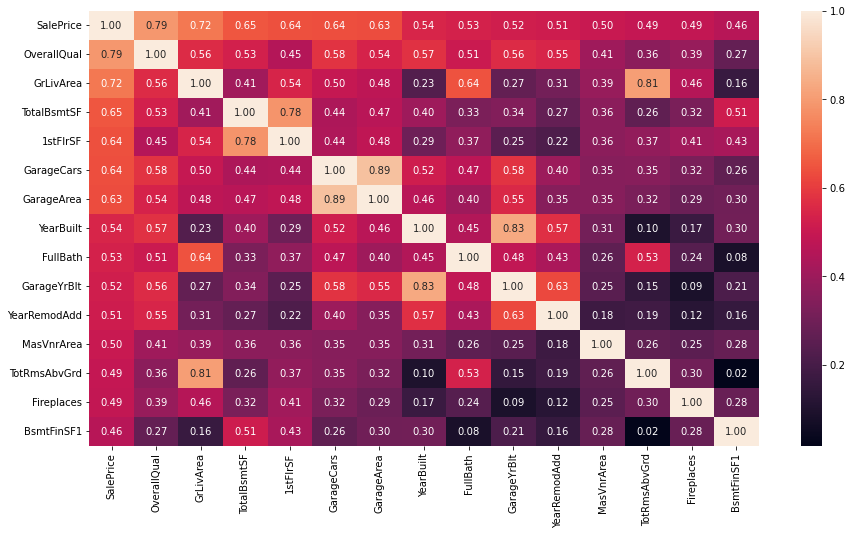

In [99]:
# Features with hight correlation only columns with correlation > 0.5

SalesCor = housing.corr()['SalePrice'].sort_values(ascending= False)

hight_correlation=housing[SalesCor[SalesCor.values > 0.45].index]


corr=hight_correlation.corr()
f, ax=plt.subplots(figsize=(15,8))
sns.heatmap(corr, annot = True, fmt = '.2f')

In [14]:
plt.figure(figsize=(15, 10))

fig = px.box(housing, x="OverallQual", y="SalePrice",color = 'OverallQual')
fig.update_layout(
    title="House Price by Overall Quality",
    xaxis_title="Quality",
    yaxis_title="Price ($)",
    legend_title="Legend Title",
    showlegend=False,
     xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
    )




fig.show()


<Figure size 1080x720 with 0 Axes>

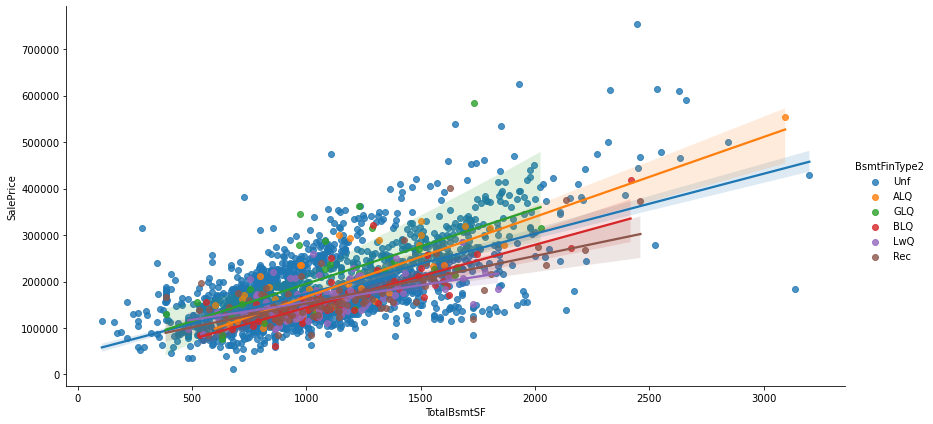

In [15]:
#sales price against Total Basment sliced by BsmtFinType1
sns.lmplot(x='TotalBsmtSF', y='SalePrice', hue='BsmtFinType2',
           data=housing_cleaned, fit_reg=True,height=6, aspect=2)


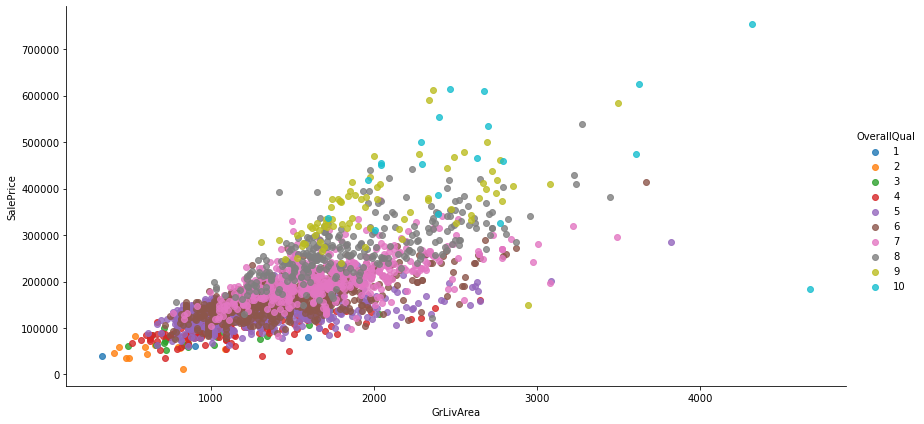

In [16]:
#sales price against Living Area sliced by Overall Quality
sns.lmplot(x='GrLivArea', y='SalePrice', hue='OverallQual',
           data=housing_cleaned, fit_reg=False,height=6, aspect=2)



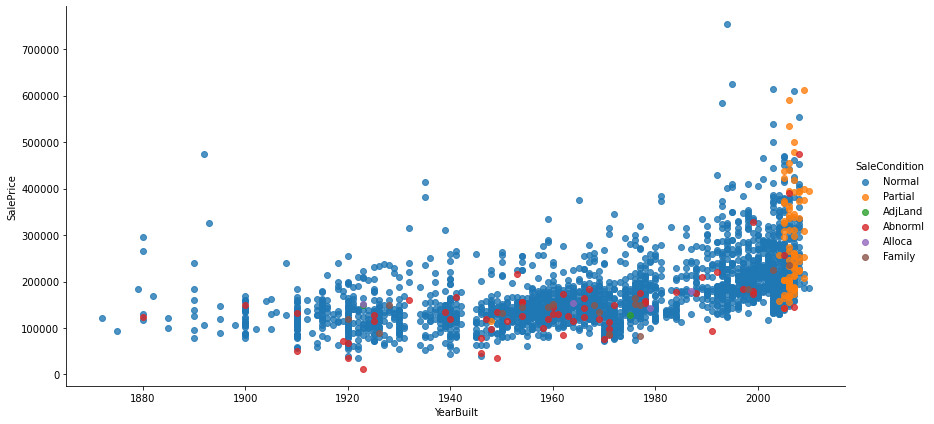

In [81]:
#sales price against Year Built sliced by BsmtFinType1
sns.lmplot(x='YearBuilt', y='SalePrice', hue='SaleCondition',
           data=housing_cleaned, fit_reg=False,height=6, aspect=2)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

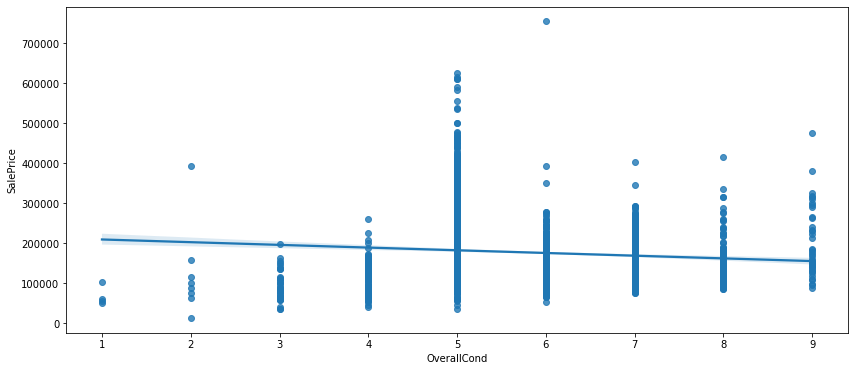

In [17]:
#sales price against Overall Condition 
fig,ax = plt.subplots(figsize=(14,6))
sns.regplot(x = 'OverallCond', y='SalePrice' , data=housing_cleaned)

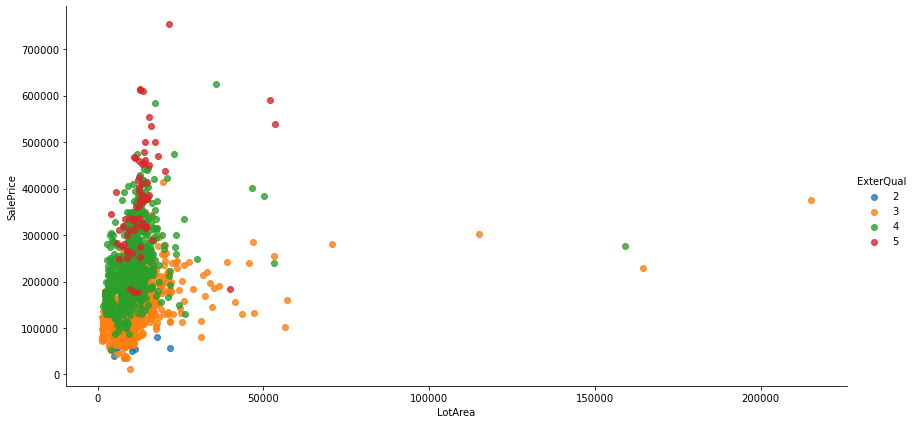

In [77]:
#sales price against Lot Area sliced by Eternal Quality
sns.lmplot(x='LotArea', y='SalePrice', hue='ExterQual',
           data=housing_cleaned, fit_reg=False,height=6, aspect=2)


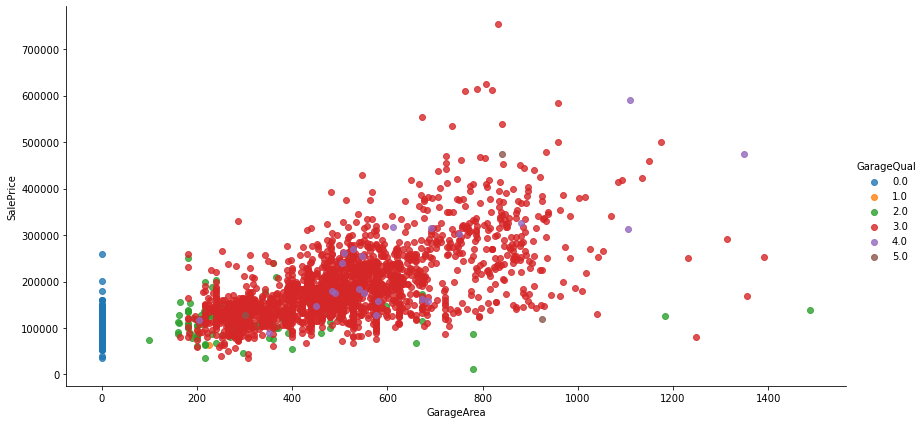

In [64]:
#Sales price against Garage Area sliced by Garage Quality
sns.lmplot(x='GarageArea', y='SalePrice', hue='GarageQual',
           data=housing_cleaned, fit_reg=False,height=6, aspect=2)


Text(0.5, 1.0, 'HeatingQC vs SalePrce')

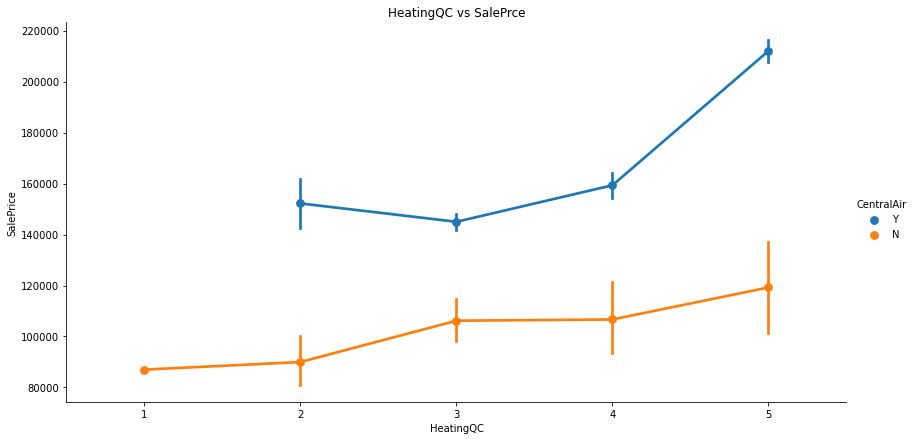

In [84]:
#Sale price vs HeatingQC  
sns.factorplot(data=housing_cleaned,x='HeatingQC',y='SalePrice',
               hue='CentralAir',size=6,aspect=2,
               estimator=np.mean)
plt.title('HeatingQC vs SalePrce')

In [6]:
px.box(housing_cleaned,x='BedroomAbvGr',y='SalePrice'
       #,color='Neighborhood'
       ,
       title='<b>Total Rooms Versus Sales Price of Houses')

# ML Prediction

In [100]:
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
#from mlxtend.regressor import StackingCVRegressor
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [101]:

#Independet Variables
X = housing_cleaned.drop(['SalePrice'], axis=1)
#Target 
#y = housing_cleaned['SalePrice'].reset_index(drop=True)
y = housing_cleaned['SalePrice']


In [54]:
X = housing_cleaned[X.GrLivArea < 4500]
X["SalePrice"] = np.log1p(X["SalePrice"])
X.reset_index(drop=True, inplace=True)

C:\Users\ask91\AppData\Local\Temp\ipykernel_19476\3450824178.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
print(X.shape)
print(Y.shape)

(2580, 79)
(2580,)


In [104]:
# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
X['MSSubClass'] = X['MSSubClass'].apply(str)
X['YrSold'] = X['YrSold'].astype(str)
X['MoSold'] = X['MoSold'].astype(str)

X['Functional'] = X['Functional'].fillna('Typ')
X['Electrical'] = X['Electrical'].fillna("SBrkr")
X['KitchenQual'] = X['KitchenQual'].fillna("TA")
X['Exterior1st'] = X['Exterior1st'].fillna(X['Exterior1st'].mode()[0])
X['Exterior2nd'] = X['Exterior2nd'].fillna(X['Exterior2nd'].mode()[0])
X['SaleType'] = X['SaleType'].fillna(X['SaleType'].mode()[0])
X["PoolQC"] = X["PoolQC"].fillna("None")

In [105]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    X[col] = X[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    X[col] = X[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    X[col] = X[col].fillna('None')

X['MSZoning'] = X.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [106]:
X = X.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

X['YrBltAndRemod']=X['YearBuilt']+X['YearRemodAdd']
X['TotalSF']=X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']

X['Total_sqr_footage'] = (X['BsmtFinSF1'] + X['BsmtFinSF2'] +
                                 X['1stFlrSF'] + X['2ndFlrSF'])

X['Total_Bathrooms'] = (X['FullBath'] + (0.5 * X['HalfBath']) +
                               X['BsmtFullBath'] + (0.5 * X['BsmtHalfBath']))

X['Total_porch_sf'] = (X['OpenPorchSF'] + X['3SsnPorch'] +
                              X['EnclosedPorch'] + X['ScreenPorch'] +
                              X['WoodDeckSF'])


In [68]:
X['haspool'] = X['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
X['has2ndfloor'] = X['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
X['hasgarage'] = X['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
X['hasbsmt'] = X['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
X['hasfireplace'] = X['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [115]:
objects = []
for i in X.columns:
    if X[i].dtype == object:
        objects.append(i)

X.update(X[objects].fillna('None'))

In [117]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes:
        numerics.append(i)
X.update(X[numerics].fillna(0))


In [118]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes:
        numerics2.append(i)

In [119]:
X.shape

(2580, 282)

In [120]:
X = pd.get_dummies(X).reset_index(drop=True)
X.shape


(2580, 282)

In [121]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
X = X.drop(overfit, axis=1)

In [122]:
X.shape

(2580, 282)

In [123]:
y_train.shape

(1935,)

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=0) 

In [125]:
from sklearn.linear_model import Lasso 
lasso=Lasso(alpha=1.0)

In [126]:
lasso.fit(X_train,y_train)

C:\Users\ask91\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.702e+11, tolerance: 1.079e+09



Lasso()

In [127]:
y_pred=lasso.predict(X_test)

In [128]:
y_pred

array([130253.94514734, 166616.54611377,  84481.40010772, 254193.30157255,
       143817.23067775, 162649.5545708 , 197026.90329072, 136698.01922704,
        75457.3623565 , 135972.53240601, 276050.76474021, 198870.00317973,
       281334.29185389, 282290.47323397,  97949.0843122 , 124993.9730031 ,
       204678.4889615 , 169316.87437619, 167565.71651937, 130255.8380987 ,
       319450.26768577, 174824.75197319, 142349.22166949, 228171.78918891,
       348910.15216726, 132579.02043713, 257364.30601456,  57346.96931758,
       101293.00239818,  99504.11535119, 131619.0347702 , 132791.67752786,
       174099.513505  , 204216.56579325, 161760.76200213, 167550.7951733 ,
       136760.62094759, 110320.99878559, 118856.95537119, 137537.52172692,
       244652.67015182, 210290.89539296, 337435.44619511, 134313.94790667,
       168631.30269103, 195211.02547787,  84457.38277268, 125107.31217364,
       234102.76050796, 221989.31603976, 157946.47377596, 182869.14711363,
       166188.01743414, 2

In [129]:
print("Slope: %.2f" % lasso.coef_[0])

Slope: 76.25


In [130]:
print("Intercept:%.2f"% lasso.intercept_)

Intercept:-766170.68


In [131]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

587522056.874709

In [132]:
np.sqrt(mean_squared_error(y_test,y_pred))

24238.85428139517

In [133]:
print("Rsquared:%.2f" % lasso.score(X_test,y_test))

Rsquared:0.90


In [134]:
def display_R2_scores(model, X_train, y_train, X_test, y_test):
    print(f'The mean cross validation score for {model} is {round(cross_val_score(model, X_train, y_train).mean(),4)}')
    print(f'The training score is {round(model.score(X_train, y_train), 4)}')
    print(f'The testing score is {round(model.score(X_test, y_test),4)}')
    print(f'The number of features is : {np.sum(model.coef_ != 0)}')

In [135]:
lasso = Lasso(alpha = 0.0002)
lasso.fit(X_train, y_train);


display_R2_scores(lasso, X_train, y_train, X_test, y_test)

C:\Users\ask91\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.656e+11, tolerance: 1.079e+09

C:\Users\ask91\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.563e+11, tolerance: 8.989e+08

C:\Users\ask91\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.833e+11, tolerance: 8.274e+08

C:\Users\ask91\anaconda3\lib\site-packages\sklearn\linear_model\_co

The mean cross validation score for Lasso(alpha=0.0002) is 0.8585
The training score is 0.9322
The testing score is 0.8977
The number of features is : 281


C:\Users\ask91\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.499e+11, tolerance: 7.994e+08



In [139]:
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

Text(0.5, 1.0, 'Predictions of Sale Price vs Actual Sale Price')

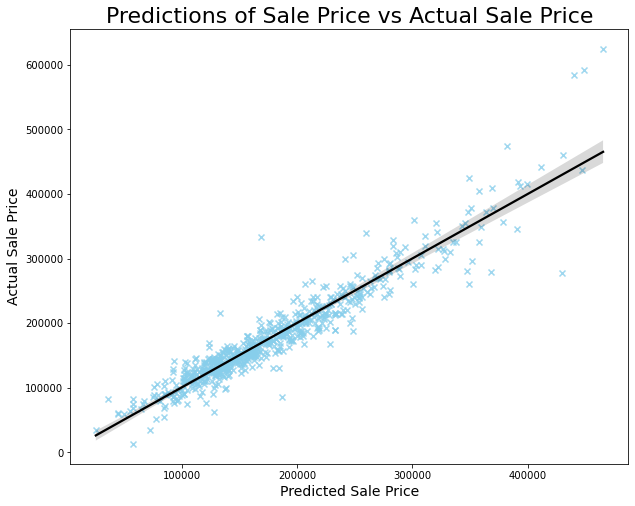

In [140]:
lasso_predict = lasso.predict(X_test)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_scaled, x=lasso_predict, y=y_test, marker='x', color='skyblue', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22)

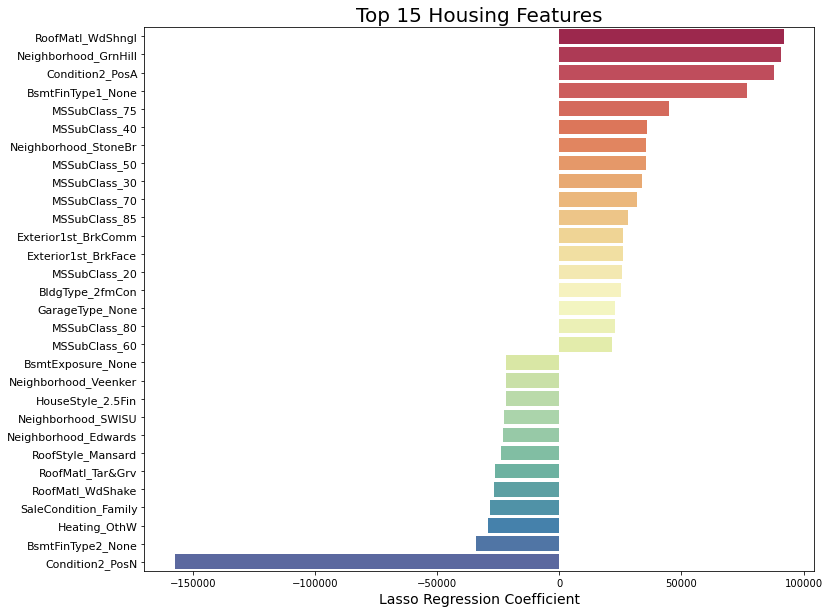

In [142]:
lasso_df = pd.DataFrame(columns=['Feature', 'Coef', 'Abs Coef'])
lasso_df['Abs Coef'] = abs(lasso.coef_)
lasso_df['Coef'] = lasso.coef_
lasso_df['Feature'] = X.columns 

# Plot top 30 features (sorted by absolute regression coefficient)
plt.figure(figsize=(12,10))
data = lasso_df.sort_values(by='Abs Coef', ascending=False).head(30)[['Feature', 'Coef']] \
               .sort_values(by='Coef', ascending=False).reset_index(drop=True)
    
ax = sns.barplot(data=data, y='Feature', x='Coef', orient='h', palette='Spectral')
ax.set_ylabel('')
ax.set_yticklabels(data['Feature'], size=11)
ax.set_xlabel('Lasso Regression Coefficient', fontsize=14)
plt.title('Top 15 Housing Features', fontsize=20);